## Examples of Eigendecomposition

This notebook contains some simple examples of eigendecomposition. 

### Example for simple 2x2 matrix

In [43]:
import numpy as np
import numpy.random as nr
import matplotlib.pyplot as plt
%matplotlib inline

A = np.array([[1,3], [3, 1]])
A

array([[1, 3],
       [3, 1]])

In [44]:
## Eigendecomposition
eigs, Q = np.linalg.eig(A)
print(np.diag(eigs))
print(Q)

[[ 4.  0.]
 [ 0. -2.]]
[[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]


In [45]:
## Check that Q is unitary and orthogonal   
Q_inv = np.linalg.inv(Q)
print(Q_inv)
print(np.dot(Q, Q_inv))

[[ 0.70710678  0.70710678]
 [-0.70710678  0.70710678]]
[[1.00000000e+00 1.11022302e-16]
 [0.00000000e+00 1.00000000e+00]]


In [46]:
## Reconstruct the matrix from eigendecomponsition 
np.dot(Q, np.dot(np.diag(eigs), np.transpose(Q)))

array([[1., 3.],
       [3., 1.]])

In [47]:
## Compute the conditon number
Cond_num = abs(eigs[0]/eigs[1])
Cond_num

1.999999999999999

In [50]:
## Find the inverse
A_inv = np.dot(np.transpose(Q), np.dot(np.diag(eigs), Q))
A_inv

array([[ 1., -3.],
       [-3.,  1.]])

In [52]:
## Test the inverse   
print(np.dot(A,A_inv/8))
print('\n')
print(np.dot(A_inv,A)/8)

[[-1.00000000e+00 -1.11022302e-16]
 [-4.99600361e-16 -1.00000000e+00]]


[[-1.00000000e+00 -4.99600361e-16]
 [-1.11022302e-16 -1.00000000e+00]]


### Eigenvalues and Rank

In [53]:
B = np.array([[3,-3,6],
            [2,-2,4],
            [1, -1, 2]])
print(B)

[[ 3 -3  6]
 [ 2 -2  4]
 [ 1 -1  2]]


In [54]:
## Eigenvalues near 0
B_eigs, B_Q = np.linalg.eig(B)
print(B_eigs)
print('\n')
print(B_Q)

[ 3.00000000e+00 -6.00567308e-17  3.57375398e-16]


[[ 8.01783726e-01 -6.17680277e-01  3.59935772e-16]
 [ 5.34522484e-01  5.35047449e-01 -8.94427191e-01]
 [ 2.67261242e-01  5.76363863e-01 -4.47213595e-01]]


In [55]:
## Large condition number   
Cond_num = abs(B_eigs[0]/B_eigs[2])
print('{0:4.3E}'.format(Cond_num))

8.395E+15


In [56]:
## Cannot reconstruct matrix
np.dot(B_Q, np.dot(np.diag(B_eigs), np.transpose(B_Q)))/9

array([[0.21428571, 0.14285714, 0.07142857],
       [0.14285714, 0.0952381 , 0.04761905],
       [0.07142857, 0.04761905, 0.02380952]])

In [57]:
## Inverse is not stable
inv_B_eigs = np.linalg.inv(np.diag(B_eigs))
print(inv_B_eigs)
print('\n')
np.dot(np.transpose(B_Q),(np.dot(inv_B_eigs, B_Q)))/9

[[ 3.33333333e-01  0.00000000e+00  0.00000000e+00]
 [-0.00000000e+00 -1.66509230e+16 -0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  2.79817807e+15]]




array([[-5.06392968e+14, -4.81227593e+14,  8.47357507e+14],
       [-4.81227593e+14, -4.26357137e+14,  8.05247782e+14],
       [ 8.47357507e+14,  8.05247782e+14, -1.41790031e+15]])

### Example with Data

Text(0.5, 1.0, 'Sample data')

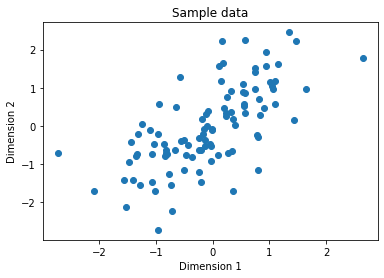

In [58]:
nr.seed(124)
cov = np.array([[1.0, 0.6], [0.6, 1.0]])
mean = np.array([0.0, 0.0])

sample = nr.multivariate_normal(mean, cov, 100)

plt.scatter(sample[:,0], sample[:,1])
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('Sample data')

In [59]:
## Compute the covariance 
cov_sample = 0.5 * np.dot(np.transpose(sample), sample)
cov_sample

array([[40.504917  , 32.86396054],
       [32.86396054, 58.31290287]])

In [60]:
## Eigendecomposition of covariance  
sample_eigs, sample_Q = np.linalg.eig(cov_sample)
print(sample_eigs)
print('\n')
print(sample_Q)
print('\nThe condition number = {0:6.3}'.format(sample_eigs[1]/sample_eigs[0]))

[15.36010683 83.45771303]


[[-0.79419984 -0.60765665]
 [ 0.60765665 -0.79419984]]

The condition number =   5.43


Text(0.5, 1.0, 'Sample data')

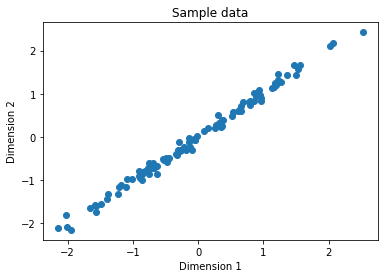

In [61]:
## Increase ccolinearity of variables 
nr.seed(124)
cov = np.array([[1.0, 0.995], [0.995, 1.0]])
mean = np.array([0.0, 0.0])

sample2 = nr.multivariate_normal(mean, cov, 100)

plt.scatter(sample2[:,0], sample2[:,1])
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('Sample data')

In [62]:
## Compute covariance and eigendecompositon   
cov_sample2 = 0.5 * np.dot(np.transpose(sample2), sample2)/4
cov_sample2
print('\n')
sample2_eigs, sample2_Q = np.linalg.eig(cov_sample2)
print(sample2_eigs)
print('\n')
print(sample2_Q)
print('\nThe condition number = {0:6.3}'.format(sample2_eigs[1]/sample2_eigs[0]))



[ 0.04868588 25.64901343]


[[-0.71474149 -0.69938873]
 [ 0.69938873 -0.71474149]]

The condition number = 5.27e+02
